# Code Testing

In [1]:
import pandas as pd
import seaborn as sns
import pylab as pl
import matplotlib.pyplot as plt

In [2]:
Data = pd.read_csv('HIV-Dataset.csv')

In [3]:
print(Data.columns)
print(Data.shape)

Index(['VL', 'CD4', 'Rel CD4', 'Gender', 'Ethnic', 'Base Drug Combo',
       'Comp. INI', 'Comp. NNRTI', 'Extra PI', 'Extra pk-En', 'VL (M)',
       'CD4 (M)', 'Drug (M)', 'PatientID', 'Timestep'],
      dtype='object')
(534960, 15)


In [106]:
Data.head(12)

,VL,CD4,Rel CD4,Gender,Ethnic,Base Drug Combo,Comp. INI,Comp. NNRTI,Extra PI,Extra pk-En,VL (M),CD4 (M),Drug (M),PatientID,Timestep
0,29.944271,793.45830,30.834505,1.0,3.0,0.0,0.0,3.0,5.0,0.0,0.0,1.0,1.0,0,0
1,29.241980,467.41890,30.355980,1.0,3.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0,1
2,28.748991,465.12485,30.405320,1.0,3.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0,2
3,28.101835,692.00690,30.248816,1.0,3.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0,3
4,28.813837,641.75714,29.944712,1.0,3.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0,4
5,28.033257,444.34845,30.647573,1.0,3.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0,5
6,27.235563,650.44740,30.108711,1.0,3.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0,6
7,26.021847,745.25540,30.728205,1.0,3.0,0.0,0.0,3.0,5.0,0.0,0.0,1.0,1.0,0,7
8,26.717731,436.72992,30.792599,1.0,3.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0,8
9,26.449913,422.91315,30.951193,1.0,3.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0,9


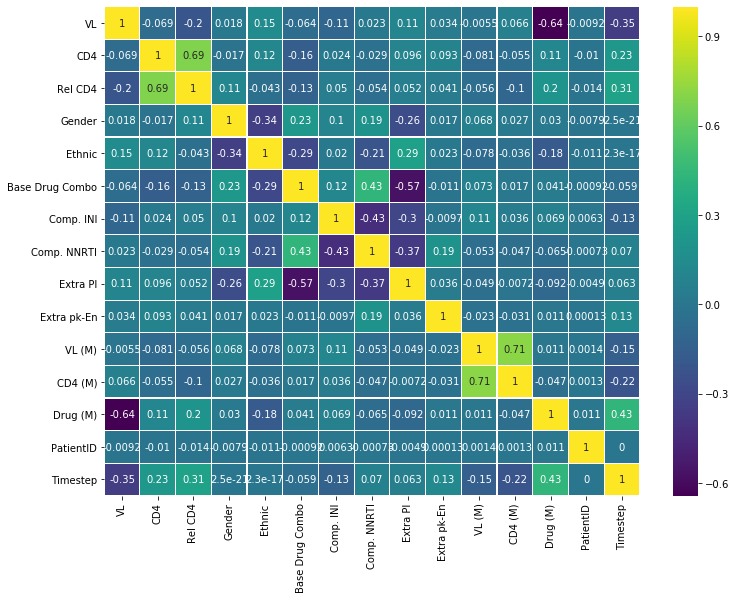

In [7]:
f, ax = plt.subplots(figsize=(12, 9)) # Setting size of the results panel
sns.heatmap(Data.corr(), linewidths=.1, annot=True, annot_kws={"size": 10}, cmap='viridis', ax=ax)

(0, 400)

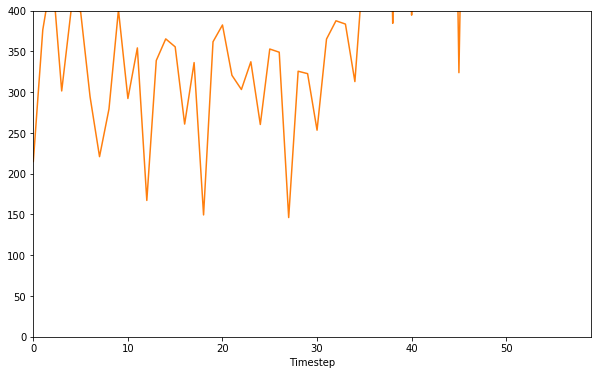

In [67]:
DataPivot = Data[0:120]
DataPivot = DataPivot.pivot(index="Timestep", columns="PatientID", values="CD4")

ax = DataPivot.plot(figsize=(10, 6))
ax.get_legend().remove()
ax.set_ylim([0, 400])

In [105]:
DataPivot2 = pd.pivot_table(Data, index=["PatientID", 'Timestep'])
print(DataPivot2.shape)
DataPivot2.unstack().swaplevel(0, 1, 1).sort_index(1)


(534960, 13)


Timestep               0                                                       \
          Base Drug Combo          CD4 CD4 (M) Comp. INI Comp. NNRTI Drug (M)   
PatientID                                                                       
0                     0.0   793.458300     1.0       0.0         3.0      1.0   
1                     0.0   215.053470     1.0       3.0         2.0      0.0   
2                     3.0  3691.489000     1.0       3.0         3.0      0.0   
3                     0.0    87.720314     1.0       3.0         2.0      1.0   
4                     0.0   241.410170     1.0       3.0         2.0      0.0   
...                   ...          ...     ...       ...         ...      ...   
8911                  0.0  1423.525900     0.0       2.0         3.0      0.0   
8912                  3.0   269.278380     1.0       3.0         3.0      1.0   
8913                  0.0   129.897110     1.0       3.0         2.0      1.0   
8914                  3.0   929.318850     1.0       3.0         3.0      0.0   
8915                  0.0  1937.683800     0.0       2.0         3.0      0.0   

Timestep                                      ...        59              \
          Ethnic Extra PI Extra pk-En Gender  ... Comp. INI Comp. NNRTI   
PatientID                                     ...                         
0            3.0      5.0         0.0    1.0  ...       0.0         3.0   
1            4.0      5.0         0.0    1.0  ...       3.0         2.0   
2            3.0      1.0         0.0    1.0  ...       3.0         3.0   
3            4.0      5.0         0.0    1.0  ...       3.0         2.0   
4            4.0      5.0         0.0    1.0  ...       3.0         2.0   
...          ...      ...         ...    ...  ...       ...         ...   
8911         4.0      5.0         1.0    1.0  ...       2.0         3.0   
8912         4.0      4.0         0.0    1.0  ...       3.0         3.0   
8913         4.0      5.0         0.0    2.0  ...       3.0         2.0   
8914         3.0      5.0         0.0    1.0  ...       3.0         3.0   
8915         4.0      5.0         1.0    1.0  ...       2.0         3.0   

Timestep                                                                      \
          Drug (M) Ethnic Extra PI Extra pk-En Gender     Rel CD4         VL   
PatientID                                                                      
0              1.0    3.0      5.0         0.0    1.0   31.390232  22.345737   
1              1.0    4.0      5.0         0.0    1.0   54.025760  36.496777   
2              1.0    3.0      0.0         1.0    1.0   52.661460  19.016823   
3              1.0    4.0      5.0         0.0    1.0   32.136948  25.835120   
4              1.0    4.0      5.0         0.0    1.0   64.795640  17.886978   
...            ...    ...      ...         ...    ...         ...        ...   
8911           1.0    4.0      5.0         1.0    1.0   21.078022   9.752996   
8912           1.0    4.0      1.0         0.0    1.0   11.150334  80.467190   
8913           1.0    4.0      5.0         0.0    2.0  148.746600  23.765930   
8914           1.0    3.0      0.0         0.0    1.0   14.618948   4.693890   
8915           1.0    4.0      5.0         1.0    1.0   39.134495   8.662724   

Timestep          
          VL (M)  
PatientID         
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  
...          ...  
8911         0.0  
8912         0.0  
8913         0.0  
8914         0.0  
8915         0.0  

[8916 rows x 780 columns]

In [46]:
DataPivot2[(DataPivot2['CD4 (M)'] == 1) | (DataPivot2['VL (M)'] == 1)].head(20)

Base Drug Combo         CD4  CD4 (M)  Comp. INI  \
PatientID Timestep                                                    
0         0                     0.0   793.45830      1.0        0.0   
          7                     0.0   745.25540      1.0        0.0   
          30                    0.0   742.34283      1.0        0.0   
1         0                     0.0   215.05347      1.0        3.0   
          2                     0.0   446.03433      1.0        3.0   
          7                     0.0   220.93442      1.0        3.0   
          12                    0.0   167.23460      1.0        3.0   
          16                    0.0   260.89250      1.0        3.0   
          18                    0.0   149.47455      1.0        3.0   
          21                    0.0   320.69440      1.0        3.0   
          24                    0.0   260.38397      1.0        3.0   
          27                    0.0   146.24036      1.0        3.0   
          30                    0.0   253.39130      1.0        3.0   
2         0                     3.0  3691.48900      1.0        3.0   
          2                     3.0  2453.10100      1.0        3.0   
          6                     3.0  2507.26930      1.0        3.0   
          7                     3.0  2986.78860      1.0        3.0   
          12                    3.0  2331.89010      1.0        3.0   
          14                    3.0  2874.36910      1.0        3.0   
          27                    3.0  3133.28600      1.0        3.0   

                    Comp. NNRTI  Drug (M)  Ethnic  Extra PI  Extra pk-En  \
PatientID Timestep                                                         
0         0                 3.0       1.0     3.0       5.0          0.0   
          7                 3.0       1.0     3.0       5.0          0.0   
          30                3.0       1.0     3.0       5.0          0.0   
1         0                 2.0       0.0     4.0       5.0          0.0   
          2                 2.0       0.0     4.0       5.0          0.0   
          7                 2.0       0.0     4.0       5.0          0.0   
          12                2.0       0.0     4.0       5.0          0.0   
          16                2.0       0.0     4.0       5.0          0.0   
          18                2.0       0.0     4.0       5.0          0.0   
          21                2.0       0.0     4.0       5.0          0.0   
          24                2.0       0.0     4.0       5.0          0.0   
          27                2.0       0.0     4.0       5.0          0.0   
          30                2.0       0.0     4.0       5.0          0.0   
2         0                 3.0       0.0     3.0       1.0          0.0   
          2                 3.0       0.0     3.0       1.0          0.0   
          6                 3.0       0.0     3.0       1.0          0.0   
          7                 3.0       0.0     3.0       1.0          0.0   
          12                3.0       0.0     3.0       1.0          0.0   
          14                3.0       0.0     3.0       1.0          0.0   
          27                3.0       0.0     3.0       1.0          0.0   

                    Gender    Rel CD4            VL  VL (M)  
PatientID Timestep                                           
0         0            1.0  30.834505     29.944271     0.0  
          7            1.0  30.728205     26.021847     0.0  
          30           1.0  30.715324     24.936848     0.0  
1         0            1.0  12.571113  31409.234000     1.0  
          2            1.0  23.397942  32045.723000     1.0  
          7            1.0  12.143556  17508.867000     1.0  
          12           1.0  12.970025   2092.896500     1.0  
          16           1.0  14.106601   3020.774400     1.0  
          18           1.0  14.034422    221.696760     1.0  
          21           1.0  23.980476   6926.563500     1.0  
          24           1.0  14.532780   

In [47]:
DataPivot2[(DataPivot2['CD4 (M)'] == 1) | (DataPivot2['VL (M)'] == 1)][186:195]

Base Drug Combo        CD4  CD4 (M)  Comp. INI  \
PatientID Timestep                                                   
15        0                     1.0  3205.0256      1.0        0.0   
          3                     1.0  2821.2498      1.0        0.0   
          7                     1.0  2931.2820      1.0        0.0   
          16                    1.0  1665.3950      1.0        0.0   
          22                    1.0  1713.0394      1.0        0.0   
          25                    1.0  1739.3842      1.0        0.0   
          30                    1.0  1725.0195      1.0        0.0   
          33                    1.0  2713.5815      1.0        0.0   
          47                    1.0   915.1285      1.0        0.0   

                    Comp. NNRTI  Drug (M)  Ethnic  Extra PI  Extra pk-En  \
PatientID Timestep                                                         
15        0                 3.0       0.0     4.0       5.0          0.0   
          3                 3.0       0.0     4.0       5.0          0.0   
          7                 3.0       0.0     4.0       5.0          0.0   
          16                3.0       0.0     4.0       5.0          0.0   
          22                3.0       0.0     4.0       5.0          0.0   
          25                3.0       0.0     4.0       5.0          0.0   
          30                3.0       0.0     4.0       5.0          0.0   
          33                3.0       0.0     4.0       5.0          0.0   
          47                3.0       1.0     4.0       5.0          0.0   

                    Gender    Rel CD4            VL  VL (M)  
PatientID Timestep                                           
15        0            1.0  39.133640  53979.055000     1.0  
          3            1.0  36.779415  80832.980000     1.0  
          7            1.0  40.155434  44071.402000     1.0  
          16           1.0  51.349940   2687.297600     0.0  
          22           1.0  50.732994   2744.348100     0.0  
          25           1.0  50.382877   2937.178000     0.0  
          30           1.0  51.228096   2601.644500     0.0  
          33           1.0  42.640514  33891.938000     1.0  
          47           1.0  57.642723     11.005625     1.0

In [87]:
Data[0:120].groupby(["PatientID"], as_index=False)